# Homework 6
## Nicholas Colonna
### "I pledge my honor that I have abided by the Stevens Honor System." 

In [3]:
import pandas as pd
import numpy as np
import pylab as pl
import statsmodels as sm
from sklearn import tree, metrics
from sklearn import model_selection, linear_model
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import math
import statistics as stat
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

df = pd.read_csv("./Hitters.csv")
df['League'] = (df['League'] == "A").astype(int)
df['Division'] = (df['Division'] == "E").astype(int)
df['NewLeague'] = (df['NewLeague'] == "A").astype(int)
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,1,1,446,33,20,NaN,1
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,0,0,632,43,10,475.0,0
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,1,0,880,82,14,480.0,1
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,0,1,200,11,3,500.0,0
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,0,1,805,40,4,91.5,0


(a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

I used the dropna() function to remove all unknown information from the salary column. From there, I utilized the numpy log function to perform a log transformation of salaries.

In [5]:
df = df.dropna(subset=['Salary'])
df['Salary'] = np.log(df['Salary'])

(b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

I created the training set using the first 200 entries by indexing from 0 to 200 for df. The remaining entries were obtained by indexing from index 200 to the end of the data.

In [6]:
train = df[0:200]
test = df[200:]

(c) Perform boosting on the training set with 1,000 trees for a range of values of the learning rate (shrinkage parameter).
Produce a plot with different learning rates (shrinkage values) on the x-axis and the corresponding training set MSE on the y-axis.

To perform the boosting with 1000 trees, I used the function GradientBoostingRegressor and set the number of estimators to 1000. I also created a list of a broad range learning rates, which i then loop through, performing the boosting with each rate. From there, I was able to plot the MSE vs Learning Rates. As you can see, there is a steep drop in MSE between 0 and 0.1 learning rates. After that, the MSE remains very close to 0.

Average Train MSE: 0.5651738579961072
Minimum Train MSE: 9.704254562347785e-08 at learning rate 0.2511886431509387


Text(0.5,1,'Training MSE at various Learning Rates')

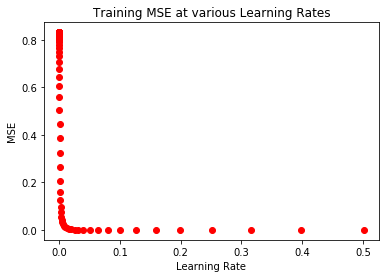

In [7]:
Y_train = train['Salary']
X_train = train.drop(['Salary', 'Unnamed: 0'], axis=1)


exp = np.arange(-10, -0.2, 0.1)
lrates = 10 ** exp
train_MSE = [None] * len(lrates)
for i in range(0, len(lrates)):
    boost = GradientBoostingRegressor(learning_rate=lrates[i], n_estimators=1000)
    boost.fit(X_train, Y_train)
    
    bag_train_pred = boost.predict(X_train)
    train_MSE[i] = np.mean((bag_train_pred - Y_train) ** 2)

print("Average Train MSE: ", np.mean(train_MSE), sep='')
print("Minimum Train MSE: ", min(train_MSE), " at learning rate ", lrates[train_MSE.index(min(train_MSE))], sep='')

plt.figure()
plt.plot(lrates, train_MSE, "ro")
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('Training MSE at various Learning Rates')

(d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.


Utilizing the same learning rates as the above section, I performed the same loop with the same boosting method. The main difference here was that I predicted the test set with the boosted model. From there, I found the minimum test MSE and plotted the test MSE vs learning rates. As you can see, the test MSE is minimized around 0.2 at a learning rate around 0.004, then MSE begins increasing a bit for higher learning rates.

Average Test MSE: 0.5019577226547259
Minimum Test MSE: 0.20495897861846973 at learning rate 0.003981071705534725


Text(0.5,1,'Test MSE at various Learning Rates')

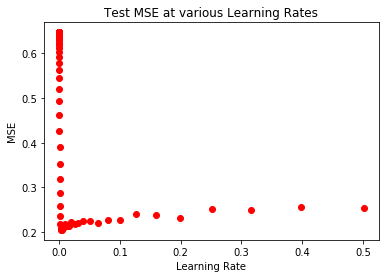

In [8]:
Y_test = test['Salary']
X_test = test.drop(['Salary', 'Unnamed: 0'], axis=1)

test_MSE = [None] * len(lrates)
for i in range(0, len(lrates)):
    boost = GradientBoostingRegressor(learning_rate=lrates[i], n_estimators=1000)
    boost.fit(X_train, Y_train)
    
    bag_test_pred = boost.predict(X_test)
    test_MSE[i] = np.mean((bag_test_pred - Y_test) ** 2)
  
print("Average Test MSE: ", np.mean(test_MSE), sep='')
print("Minimum Test MSE: ", min(test_MSE), " at learning rate ", lrates[test_MSE.index(min(test_MSE))], sep='')
   
plt.figure()
plt.plot(lrates, test_MSE, "ro")
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('Test MSE at various Learning Rates')

(e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches previously studied.

For my two alternative methods for regressions, I chose to run a linear regression and a K-NN regression with K=20. I chose these two methods because we studied them earlier in the semester and they both add a different perspective for comparison.

In [9]:
linear = linear_model.LinearRegression().fit(X_train, Y_train)
linear_test_pred = linear.predict(X_test)
linear_test_MSE = np.mean((linear_test_pred - Y_test) ** 2)
print("Linear Model Test MSE:", linear_test_MSE)

knn = KNeighborsRegressor(n_neighbors=20).fit(X_train, Y_train)
knn_test_pred = knn.predict(X_test)
knn_test_MSE = np.mean((knn_test_pred - Y_test) ** 2)
print("K-NN Model Test MSE:", knn_test_MSE)

Linear Model Test MSE: 0.49179593754549306
K-NN Model Test MSE: 0.3020928543843052


(f) Which variables appear to be the most important predictors in the boosted model?

After re-running the boost with the learning rate that minimized the test MSE, I used the feature_importance characteristic to find which predictors were most important to the model. As you can see, the results show that CAtBat, CHits, Years and CHmRun are the four most important predictors for our boosted model, respectively, since they have the highest importance scores.

In [15]:
boost_minMSE = GradientBoostingRegressor(learning_rate=lrates[test_MSE.index(min(test_MSE))], n_estimators=1000)
boost_minMSE.fit(X_train, Y_train)

feature_importances = pd.DataFrame(boost_minMSE.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)


           importance
CAtBat       0.184233
CHits        0.163582
Years        0.115894
CHmRun       0.100999
CRuns        0.071664
CWalks       0.058014
Walks        0.043872
Hits         0.041596
PutOuts      0.040750
Errors       0.039747
CRBI         0.025663
RBI          0.024960
AtBat        0.024551
HmRun        0.016149
Assists      0.014634
NewLeague    0.013145
Runs         0.012455
League       0.004651
Division     0.003441


(g) Now apply bagging to the training set. What is the test set MSE for this approach?

First, I used the BaggingRegressor function to perform bagging on the training set and fit the model. From there, I predicted the test set with the model. Finally, I calculated the MSE for the test set.

In [16]:
bagging = BaggingRegressor(n_estimators=1000)
bagging.fit(X_train, Y_train)

bagging_test_pred = bagging.predict(X_test)
bag_MSE = np.mean((bagging_test_pred - Y_test) ** 2)
print('Bagging Test MSE:', bag_MSE)

Bagging Test MSE: 0.22681534970201192
